<a href="https://colab.research.google.com/github/lejaaprianza/ML-Projects/blob/master/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline  

In [ ]:
!unzip 'archive.zip' -d 'HousePrice'

Archive:  archive.zip
  inflating: HousePrice/sample_submission.csv  
  inflating: HousePrice/test.csv     
  inflating: HousePrice/train.csv    


##**datasets is from** [here](https://www.kaggle.com/anmolkumar/house-price-prediction-challenge/code)

In [ ]:
train = pd.read_csv('HousePrice/train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
test = pd.read_csv('HousePrice/test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
train.shape

(29451, 12)

In [ ]:
train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
train.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


In [ ]:
pd.isna(train).sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

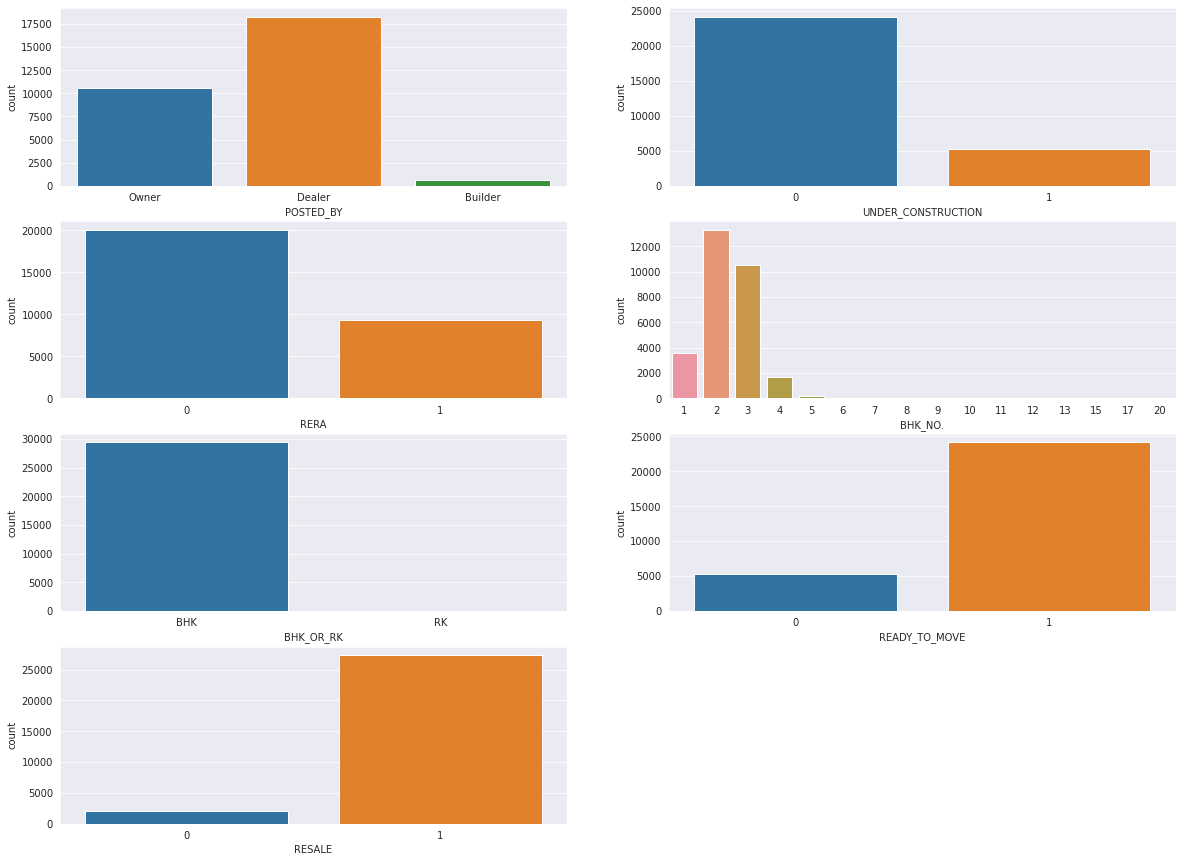

In [ ]:
i = 1
plt.figure(figsize=(20,15))
for col in ['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'READY_TO_MOVE', 'RESALE']:
    plt.subplot(4,2,i)
    sns.countplot(train[col])
    i+=1

In [ ]:
train['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [ ]:
train.drop(['BHK_OR_RK','ADDRESS'], axis=1, inplace=True )

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 2.2+ MB


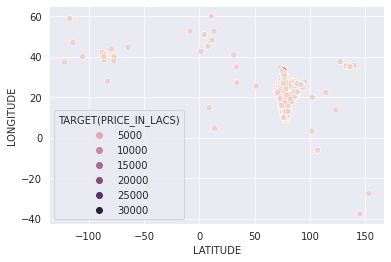

In [ ]:
sns.scatterplot(x='LATITUDE', y='LONGITUDE', hue='TARGET(PRICE_IN_LACS)', data=train)

In [ ]:
train['POSTED_BY']= train['POSTED_BY'].replace({'Owner':0, 'Dealer':1, 'Builder':2})
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,0,2,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,2,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,2,999.009247,0,1,22.592200,88.484911,60.5


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
X = train.iloc[:,0:9]  
y = train.iloc[:,9] 
bestfeatures = SelectKBest(f_classif, k=9)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']
print(featureScores.nlargest(9,'Score')) 

           Attributes          Score
4           SQUARE_FT  127033.116987
3             BHK_NO.      10.872125
0           POSTED_BY       9.048034
6              RESALE       5.920373
5       READY_TO_MOVE       3.820521
1  UNDER_CONSTRUCTION       3.820521
2                RERA       3.350142
7           LONGITUDE       1.846921
8            LATITUDE       1.286917


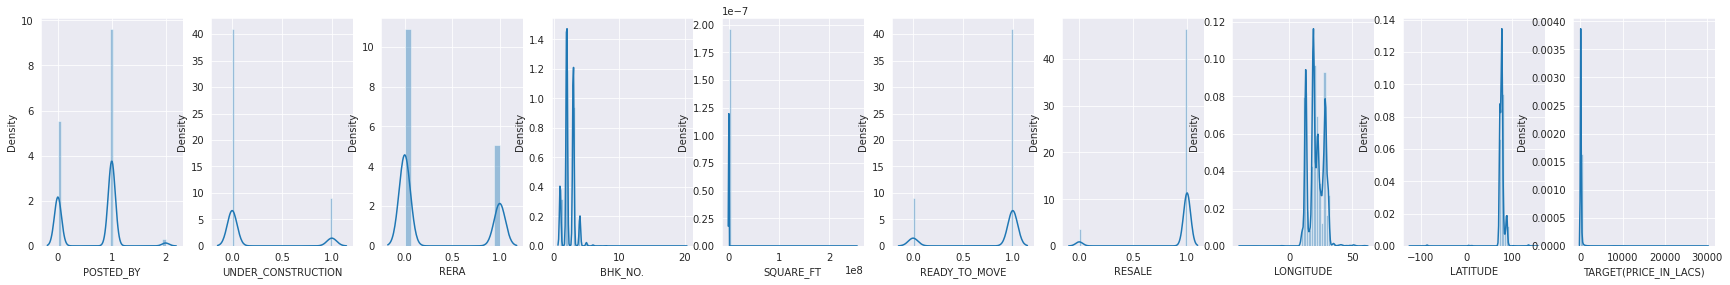

In [ ]:
L = train.columns.values
no_of_columns = 10
no_of_rows = len(L)-1/no_of_columns
plt.figure(figsize=(3*no_of_columns,5*no_of_rows))
for i in range(0,len(L)):
    plt.subplot(no_of_rows + 1,no_of_columns,i+1)
    sns.distplot(train[L[i]],kde=True)

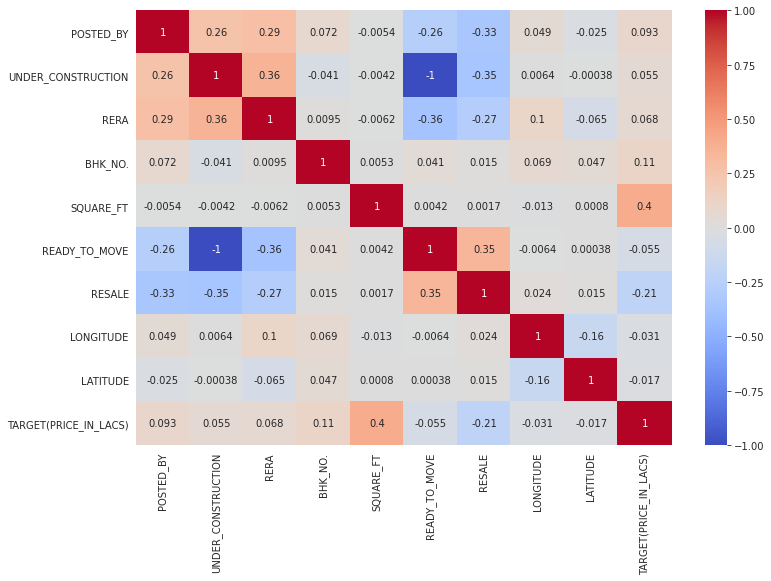

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')

In [ ]:
train.drop('READY_TO_MOVE', axis=1, inplace=True)

In [ ]:
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,1300.236407,1,12.969910,77.597960,55.0
1,1,0,0,2,1275.000000,1,12.274538,76.644605,51.0
2,0,0,0,2,933.159722,1,12.778033,77.632191,43.0
3,0,0,1,2,929.921143,1,28.642300,77.344500,62.5
4,1,1,0,2,999.009247,1,22.592200,88.484911,60.5


In [ ]:
X= train.drop('TARGET(PRICE_IN_LACS)', axis=1)
y= train['TARGET(PRICE_IN_LACS)']

In [ ]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,RESALE,LONGITUDE,LATITUDE
0,0,0,0,2,1300.236407,1,12.969910,77.597960
1,1,0,0,2,1275.000000,1,12.274538,76.644605
2,0,0,0,2,933.159722,1,12.778033,77.632191
3,0,0,1,2,929.921143,1,28.642300,77.344500
4,1,1,0,2,999.009247,1,22.592200,88.484911
